In [163]:
import pandas as pd
import numpy as np 

In [179]:
import matplotlib.pyplot as plt
import seaborn as sns
import os

## Import Dataset


In [180]:
data_df = pd.read_csv("./PycharmProjects/Temperature.csv")

In [181]:
data_df.head()

,Year,Month,Season,Salinity,Temperature,CHLFa
0,1990,1,winter,29.19,4.0,1.3
1,1990,2,winter,27.37,6.0,NaN
2,1990,3,spring,24.99,7.3,21.1
3,1990,4,spring,28.79,8.2,25.0
4,1990,5,spring,33.28,17.4,10.2


## Data Imputation (Missing Data Replacement)

In [182]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8528 entries, 0 to 8527
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Year         8528 non-null   int64  
 1   Month        8528 non-null   int64  
 2   Season       8528 non-null   object 
 3   Salinity     7730 non-null   float64
 4   Temperature  7601 non-null   float64
 5   CHLFa        7715 non-null   float64
dtypes: float64(3), int64(2), object(1)
memory usage: 399.9+ KB


In [183]:
data_df.isnull().sum().sum()

2538

In [184]:
data_df.isnull().sum()

Year             0
Month            0
Season           0
Salinity       798
Temperature    927
CHLFa          813
dtype: int64

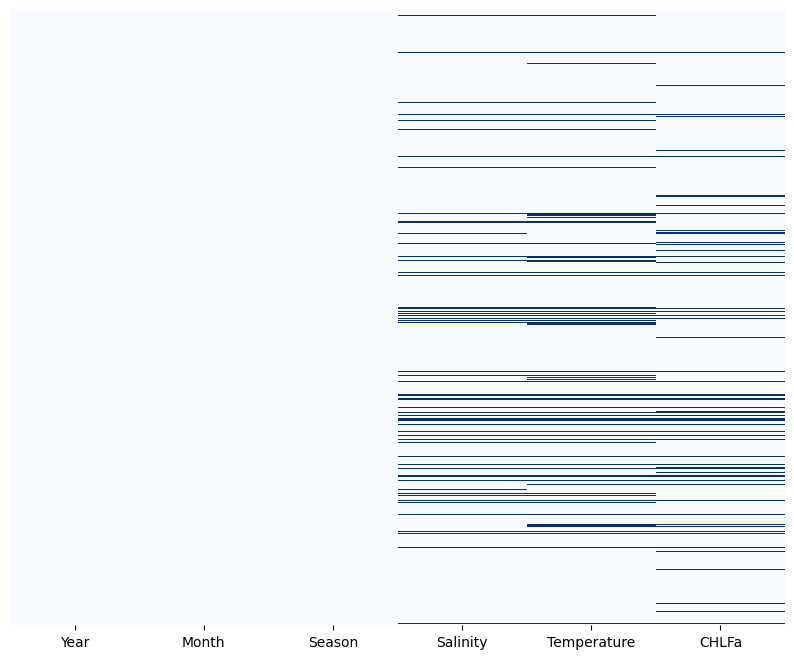

In [185]:
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(data_df.isna(), cmap="Blues", cbar=False, yticklabels=False);

In [186]:
data_df[pd.isnull(data_df).any(axis=1)]

,Year,Month,Season,Salinity,Temperature,CHLFa
1,1990,2,winter,27.37,6.00,NaN
75,1994,10,autumn,27.49,9.00,NaN
86,1995,8,summer,NaN,NaN,15.1
92,1996,2,winter,NaN,NaN,NaN
125,1997,9,autumn,31.13,14.80,NaN
...,...,...,...,...,...,...
8497,2004,8,summer,NaN,NaN,16.2
8498,2004,8,summer,29.07,20.67,NaN
8503,2004,10,autumn,NaN,NaN,NaN
8521,2005,9,autumn,29.61,17.87,NaN


In [187]:
data_df.Salinity.fillna(data_df.Salinity.mean(), inplace=True)
data_df.Temperature.fillna(data_df.CHLFa.mean(), inplace=True)
data_df.CHLFa.fillna(data_df.CHLFa.mean(), inplace=True)

In [188]:
data_df.isnull().sum()

Year           0
Month          0
Season         0
Salinity       0
Temperature    0
CHLFa          0
dtype: int64

In [189]:
data_df

,Year,Month,Season,Salinity,Temperature,CHLFa
0,1990,1,winter,29.19,4.00,1.300000
1,1990,2,winter,27.37,6.00,6.960299
2,1990,3,spring,24.99,7.30,21.100000
3,1990,4,spring,28.79,8.20,25.000000
4,1990,5,spring,33.28,17.40,10.200000
...,...,...,...,...,...,...
8523,2005,9,autumn,30.91,15.47,11.400000
8524,2005,10,autumn,31.18,13.45,8.300000
8525,2005,10,autumn,28.67,12.09,4.560000
8526,2005,11,autumn,29.53,9.03,4.940000


<Axes: >

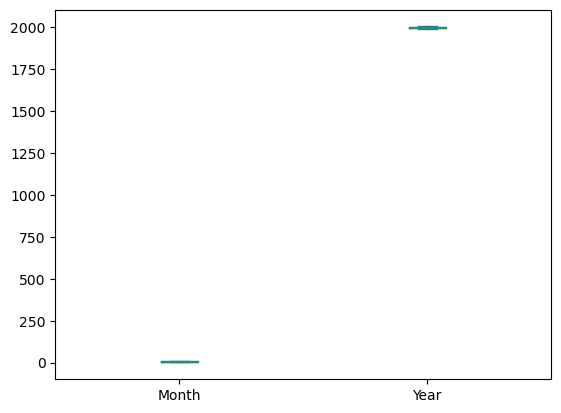

In [245]:
data_df[['Month', 'Year']].plot(kind='box')

In [246]:
df=data_df[['Month', 'Year']]

In [247]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
mms.fit(df)
data_mms = mms.transform(df)

In [248]:
data_mms=pd.DataFrame(data_mms, columns=['Month', 'Year'])
data_mms.head(10)

,Month,Year
0,0.000000,0.0
1,0.090909,0.0
2,0.181818,0.0
3,0.272727,0.0
4,0.363636,0.0
5,0.454545,0.0
6,0.545455,0.0
7,0.636364,0.0
8,0.727273,0.0
9,0.818182,0.0


Text(0.5, 1.0, 'data after max_min normalization')

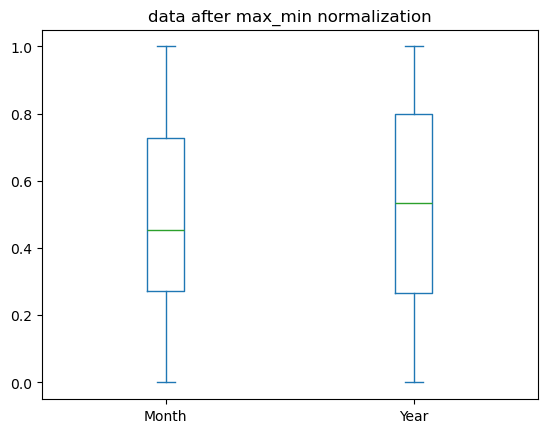

In [249]:
data_mms.plot(kind='box')
plt.title('data after max_min normalization')

In [251]:
from sklearn.preprocessing import StandardScaler 
sc=StandardScaler()
data_stand=sc.fit_transform(df)

In [254]:
data_stand=pd.DataFrame(data_stand, columns=['Month','Year'])
data_stand.describe()

,Month,Year
count,8.528000e+03,8.528000e+03
mean,-1.324769e-16,-2.196784e-14
std,1.000059e+00,1.000059e+00
min,-1.685512e+00,-1.798683e+00
25%,-7.512022e-01,-8.861534e-01
50%,-1.283289e-01,2.637648e-02
75%,8.059812e-01,9.389064e-01
max,1.740291e+00,1.623304e+00


Text(0.5, 1.0, 'data after standardization')

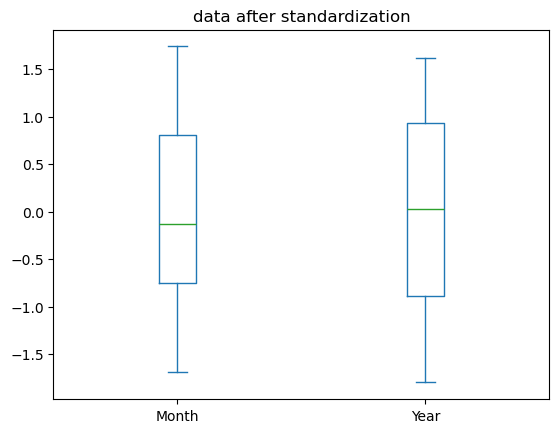

In [255]:
data_stand.plot(kind='box')
plt.title('data after standardization')

In [264]:
data_df.to_csv('nhiet_do.csv')